In [218]:
import numpy as np

import matplotlib.pyplot as plt
import igraph as ig
from eptnr.datasets.dataset_loader import load_dataset
from eptnr.datasets.synthetic_datasets import SyntheticDatasets
from eptnr.constants.travel_metric import TravelMetric
from eptnr.rewards.utils.graph_computation_utils import get_tt_hops_com_dfs

from eptnr.analysis.full_problem_exploration import full_problem_exploration
from eptnr.plotting.solution_plotting import plot_full_problem_exploration
from eptnr.plotting.data_exploration import plot_travel_time_histogram

import pandas as pd
from eptnr.algorithms.baselines.optimal_baseline import optimal_max_baseline
import seaborn as sns


# Dataset loading

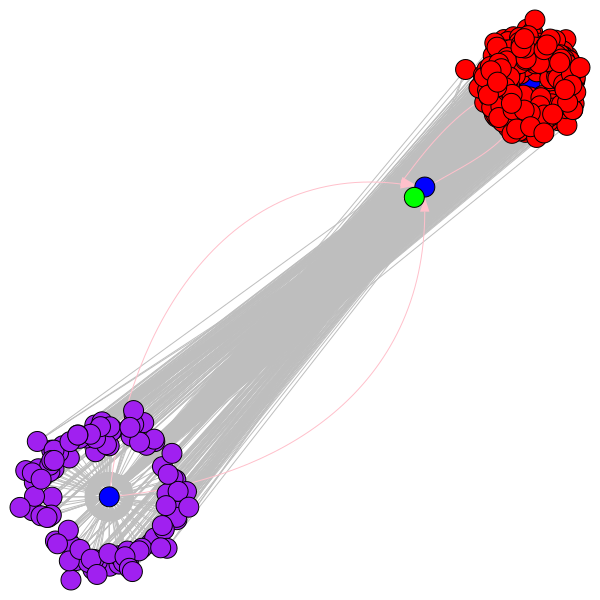

In [219]:
graph, census = load_dataset(SyntheticDatasets.SIX)
ig.plot(graph)

# Data Anaysis

In [182]:
tt_df, _, _ = get_tt_hops_com_dfs(graph, census, 50)

<AxesSubplot: xlabel='travel time', ylabel='Count'>

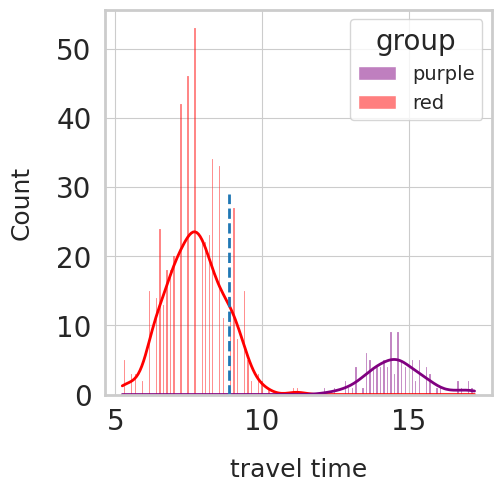

In [184]:
plot_travel_time_histogram(graph, census, min_x=0, max_x=25)

In [185]:
from eptnr.plotting.solution_plotting import plot_rewards_and_graphs

# Egalitarian

In [186]:
from eptnr.rewards.egalitarian import EgalitarianTheilAndCostReward

## Reward setup

In [187]:
graph.es.select(type_ne='walk')['cost']

[11, 11, 11, 11]

In [188]:
total_graph_cost = sum(graph.es.select(type_ne='walk')['cost'])
total_graph_cost

44

In [189]:
max_travel_time = max(graph.es.select(type_ne='walk')['tt'])
edge_types = set(graph.es.select(type_ne='walk')['type'])

In [190]:
monetary_budget = 33
groups = None
metrics = [TravelMetric.TT]


egalitarian_reward = EgalitarianTheilAndCostReward(
    census_data=census,
    com_threshold=0,
    groups=groups,
    metrics=metrics,
    verbose=True,
    total_graph_cost=total_graph_cost,
    monetary_budget=monetary_budget
)

## Running optimal baseline

In [191]:
egalitarian_max_solutions = optimal_max_baseline(graph, egalitarian_reward, edge_types=edge_types)

  0%|          | 0/4 [00:00<?, ?it/s]INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=2407	n_vertices=604
Created subgraph:
	n_edges=2406
	n_vertices=604
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=0.01786730901225006
	scaled_reward=0.01786730901225006
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/algorithms/baselines/optimal_baseline.py:For state [2403] obtained rewards -7.358914426078698
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=2407	n_vertices=604
Created subgraph:
	n_edges=2406
	n_vertices=604
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=0.04250575092979052
	scaled_reward=0.04250575092979052
INFO:/home/rico

In [192]:
egalitarian_max_solutions

[(-0.005279019471565517, [2403, 2404, 2405])]

# Evaluation

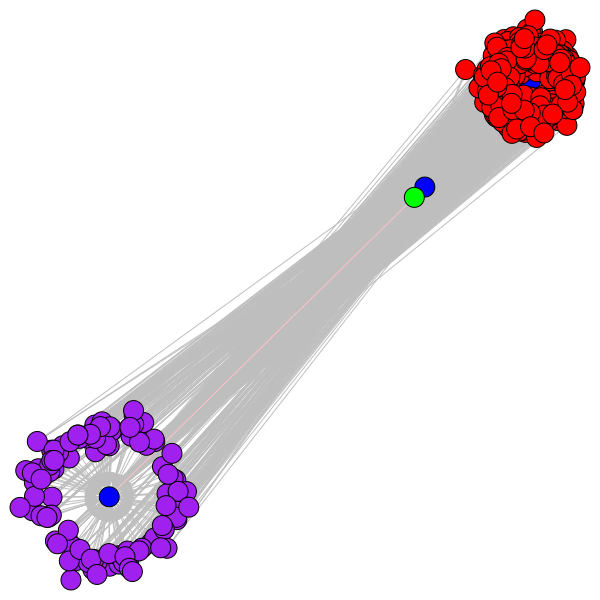

In [193]:
egalitarian_graph_prime = graph.subgraph_edges([e.index for e in graph.es if e.index not in egalitarian_max_solutions[0][1]])
ig.plot(egalitarian_graph_prime)


INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/analysis/full_problem_exploration.py:Possible states: [[[]], [[2403], [2404], [2405], [2406]], [[2403, 2404], [2403, 2405], [2403, 2406], [2404, 2405], [2404, 2406], [2405, 2406]], [[2403, 2404, 2405], [2403, 2404, 2406], [2403, 2405, 2406], [2404, 2405, 2406]]]
  0%|          | 0/4 [00:00<?, ?it/s]INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=2407	n_vertices=604
Created subgraph:
	n_edges=2407
	n_vertices=604
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=0.04250575092979052
	scaled_reward=0.04250575092979052
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/analysis/full_problem_exploration.py:For state [] obtained rewards [-6.66923074041584]
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/ep

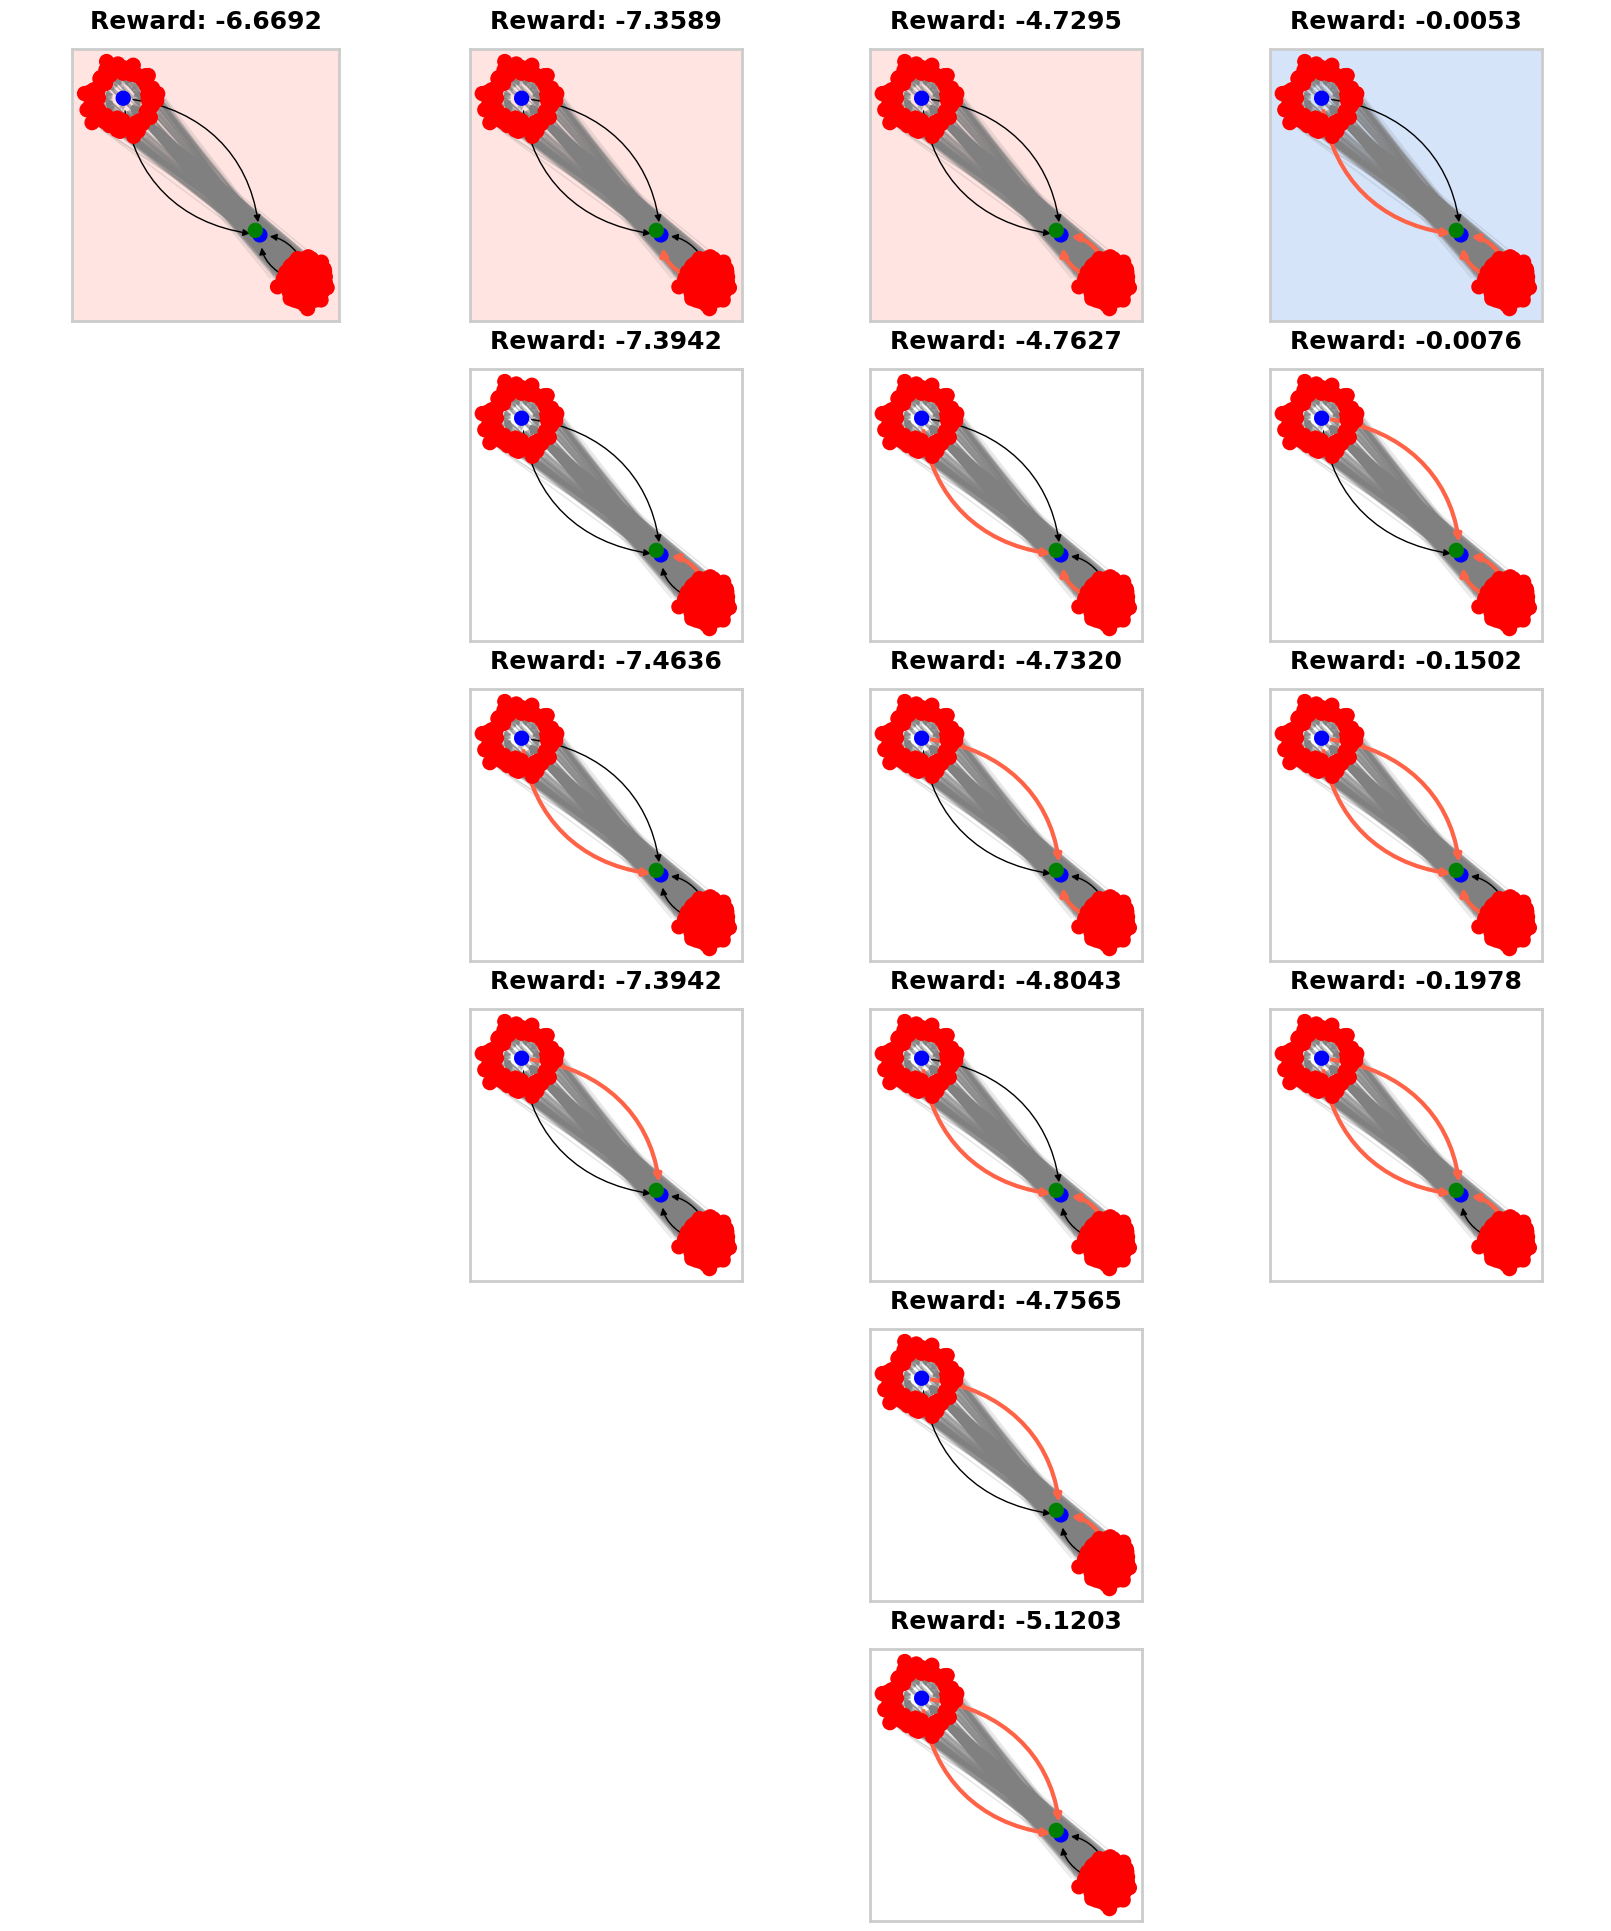

In [194]:
configurations, rewards = full_problem_exploration(g=graph, reward=egalitarian_reward, edge_types=edge_types)
fig, axs = plot_full_problem_exploration(base_graph=graph, configurations=configurations, rewards=rewards)
plt.show()

In [ ]:
from typing import List
def plot_full_problem_exploration(base_graph: ig.Graph, configurations: List[List[List[int]]],
                                  rewards: List[List[float]], ax: plt.Axes = None, edge_types_to_plot: List[str] = None):

    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

    for i, (config_candidates, rewards_candidates) in enumerate(zip(configurations, rewards)):
        max_reward = max(rewards_candidates)

        for j, (cand, reward) in enumerate(zip(config_candidates, rewards_candidates)):
            plot_graph(ax=ax[j, i], base_graph=base_graph, edges=cand, edge_types_to_plot=edge_types_to_plot)
            # ax[j, i].legend([], [f'$\\mathdefault{reward}$'],
            #                 loc="lower center", title="Reward")
            font = {'family': 'DejaVu Sans',
                    'color': 'black',
                    'weight': 'bold',
                    'size': 18
                    }

            # add text with custom font
            ax[j, i].set_title(f'Reward: {reward:.4f}', fontdict=font)
            ax[j, i].set_xticks([])
            ax[j, i].set_yticks([])
            if reward == absolute_max:
                ax[j, i].set_facecolor((0.2, 0.47, 0.9, 0.2))
            elif reward == max_reward:
                ax[j, i].set_facecolor((1.0, 0.47, 0.42, 0.2))

        for a in ax[j + 1:, i]:
            a.axis('off')

    # fig.subplots_adjust(wspace=0, hspace=1)
    # fig.tight_layout()
    # plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    return fig, ax

<AxesSubplot: xlabel='travel time', ylabel='Count'>

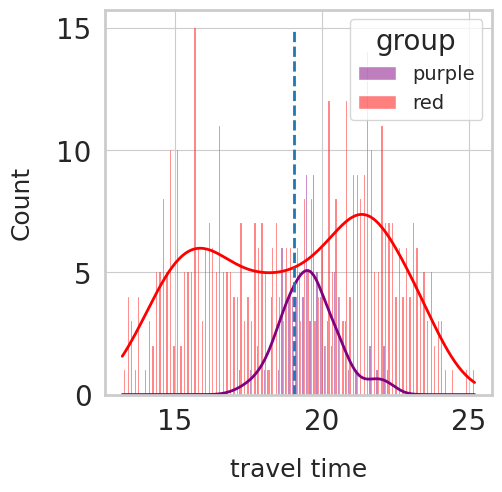

In [195]:
plot_travel_time_histogram(egalitarian_graph_prime, census, min_x=0, max_x=25)

# Utilitarian

In [196]:
from eptnr.rewards.utilitarian import UtilitarianCostReward, UtilitarianReward

## Reward Setup

In [197]:
utilitarian_reward = UtilitarianCostReward(
    census_data=census,
    com_threshold=0,
    groups=groups,
    metrics=metrics,
    verbose=True,
    total_graph_cost=total_graph_cost,
    monetary_budget=monetary_budget,
    max_travel_time=max_travel_time,
)

## Algorithms

In [198]:
utilitarian_max_solutions = optimal_max_baseline(graph, utilitarian_reward, edge_types=edge_types)
utilitarian_max_solutions

  0%|          | 0/4 [00:00<?, ?it/s]INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=2407	n_vertices=604
Created subgraph:
	n_edges=2406
	n_vertices=604
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=-24.310560000000002
	scaled_reward=-24.310560000000002
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/algorithms/baselines/optimal_baseline.py:For state [2403] obtained rewards -18.420213996279884
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=2407	n_vertices=604
Created subgraph:
	n_edges=2406
	n_vertices=604
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=-22.310560000000002
	scaled_reward=-22.310560000000002
INFO:/home/ric

[(-16.035109466272267, [2404, 2406])]

## Evaluation

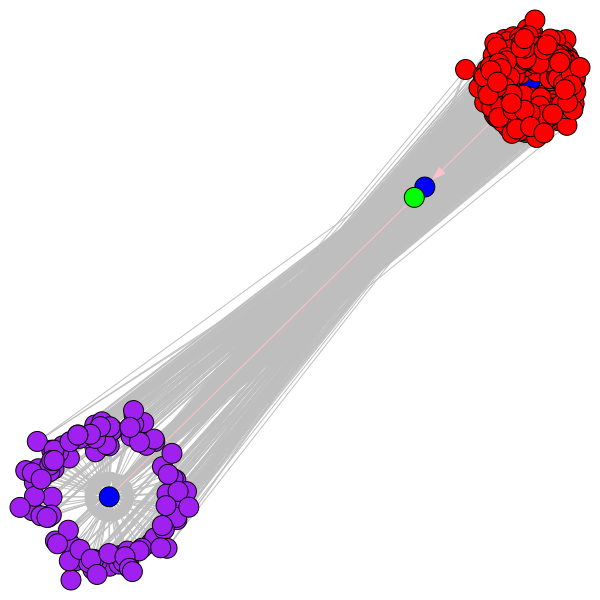

In [199]:
utilitarian_graph_prime = graph.subgraph_edges([e.index for e in graph.es if e.index not in utilitarian_max_solutions[0][1]])
ig.plot(utilitarian_graph_prime)

<AxesSubplot: xlabel='travel time', ylabel='Count'>

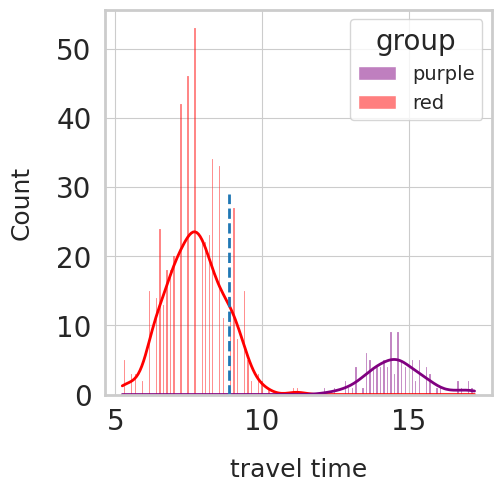

In [200]:
plot_travel_time_histogram(utilitarian_graph_prime, census, min_x=0, max_x=25)

INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/analysis/full_problem_exploration.py:Possible states: [[[]], [[2403], [2404], [2405], [2406]], [[2403, 2404], [2403, 2405], [2403, 2406], [2404, 2405], [2404, 2406], [2405, 2406]], [[2403, 2404, 2405], [2403, 2404, 2406], [2403, 2405, 2406], [2404, 2405, 2406]]]
  0%|          | 0/4 [00:00<?, ?it/s]INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=2407	n_vertices=604
Created subgraph:
	n_edges=2407
	n_vertices=604
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=-22.310560000000002
	scaled_reward=-22.310560000000002
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/analysis/full_problem_exploration.py:For state [] obtained rewards [-18.338305603632925]
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/

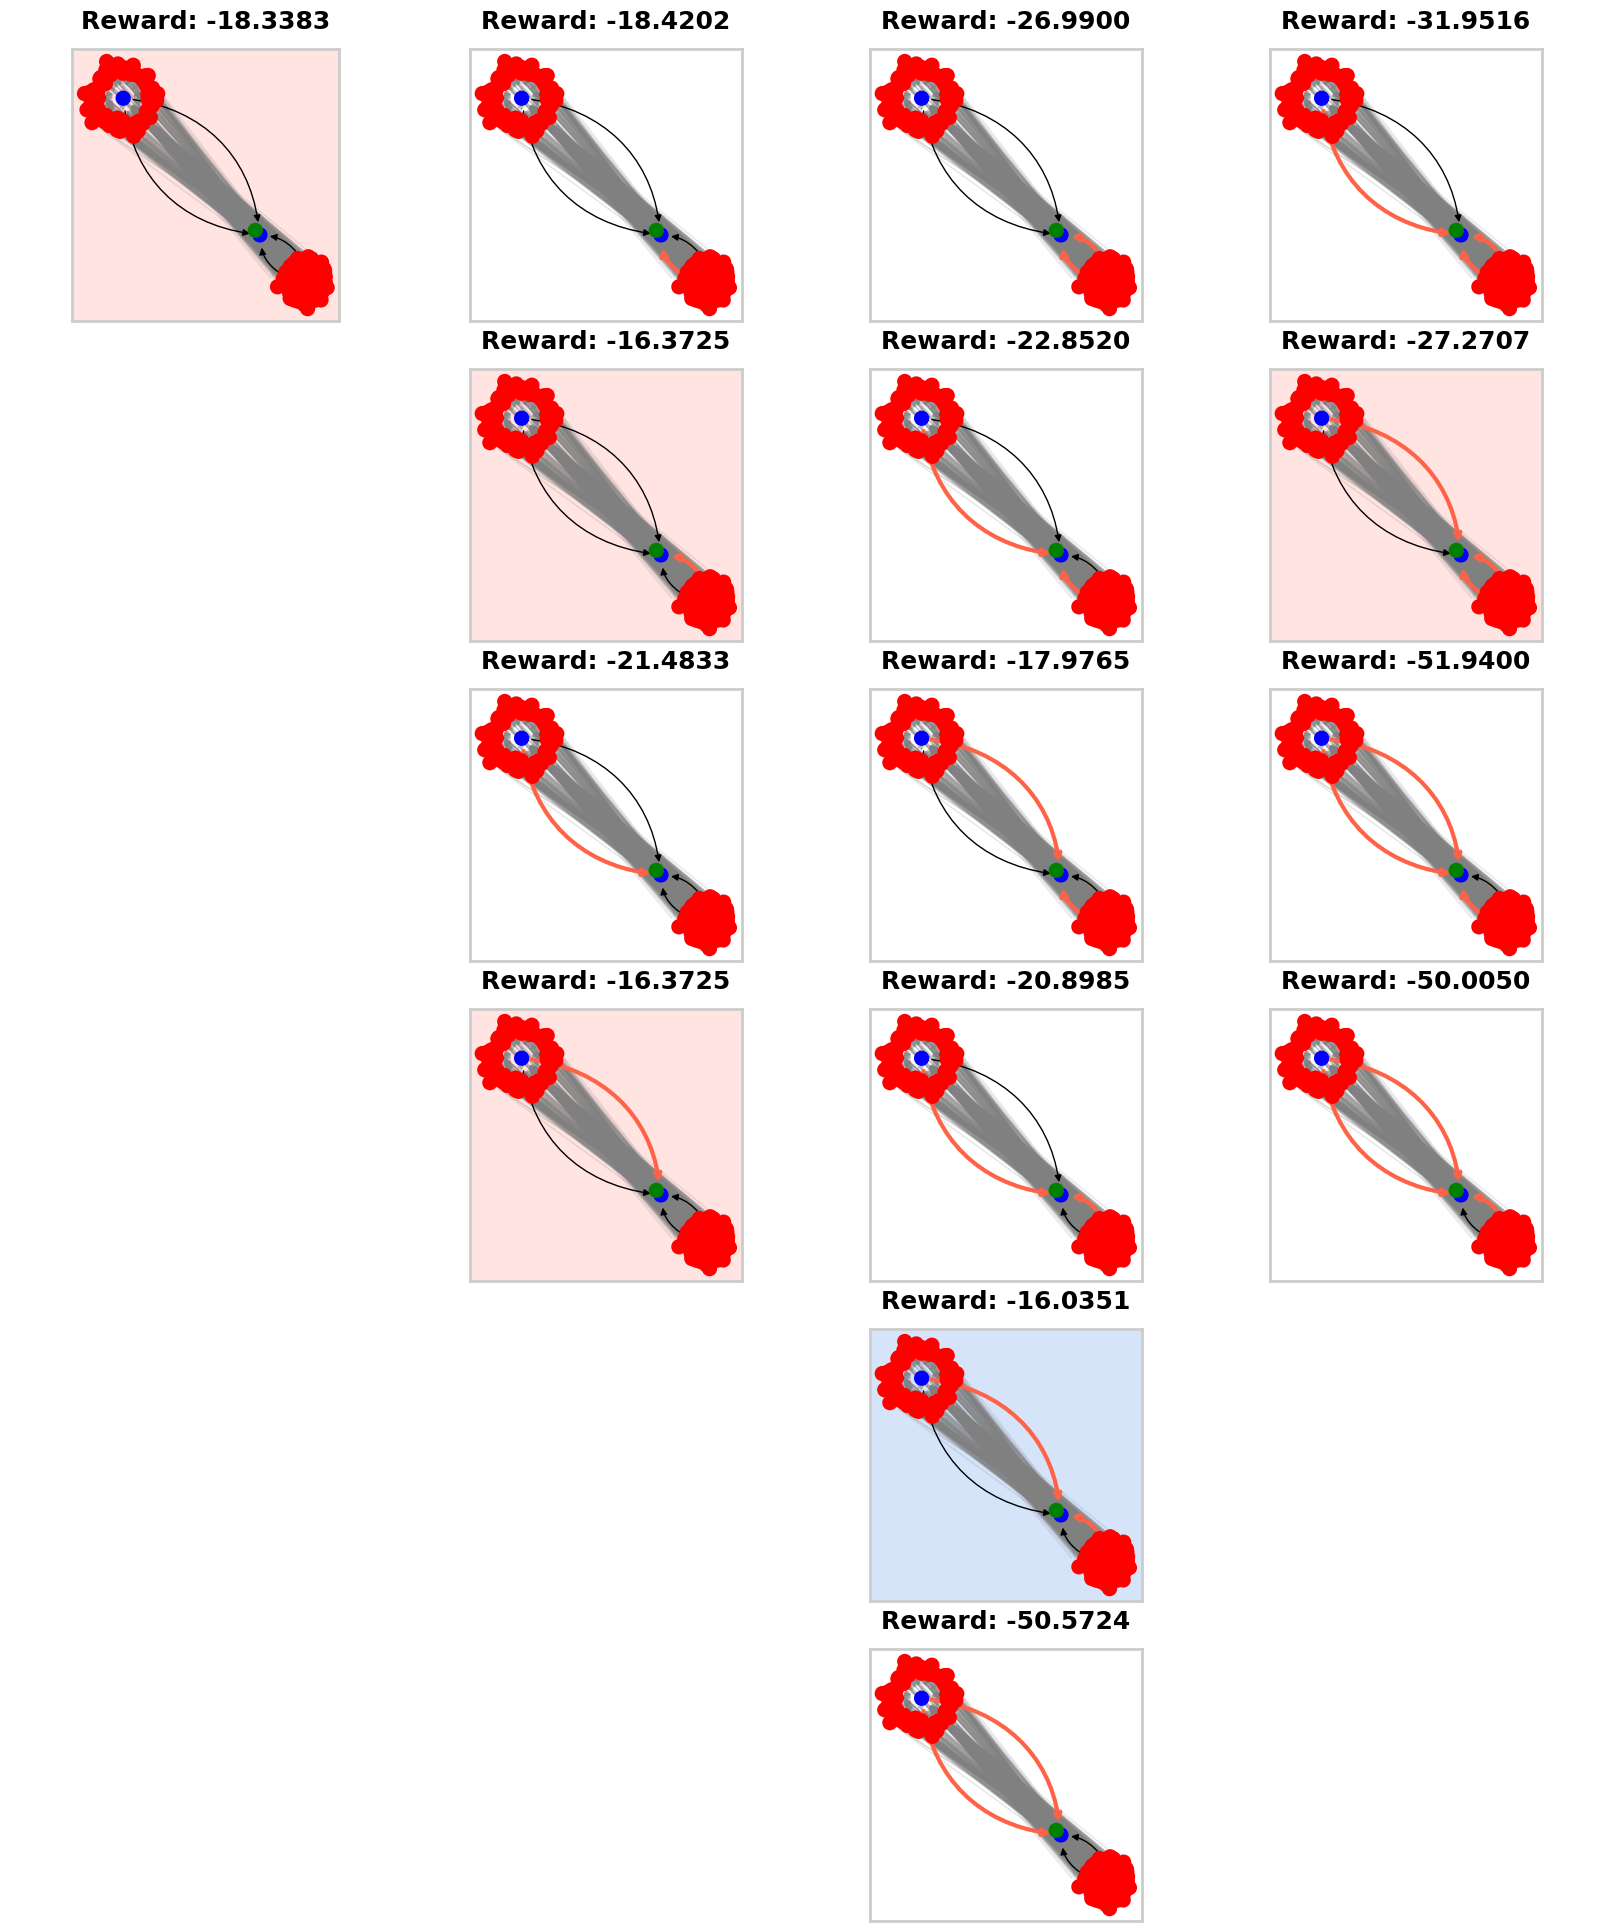

In [201]:
configurations, rewards = full_problem_exploration(g=graph, reward=utilitarian_reward, edge_types=edge_types)
fig, axs = plot_full_problem_exploration(base_graph=graph, configurations=configurations, rewards=rewards)
plt.show()

# Sufficitarian

In [202]:
from eptnr.rewards.sufficientarian import SufficientarianCostReward

## Reward Setup

In [203]:
sufficiency = {
    TravelMetric.TT: 22
}

sufficientarian_reward = SufficientarianCostReward(census_data=census, com_threshold=0,
                                   sufficiency=sufficiency, total_graph_cost=total_graph_cost, monetary_budget=monetary_budget,
                                   groups=groups, metrics=metrics, verbose=True)

## Running Optimal Baseline

In [204]:
sufficientarian_max_solutions = optimal_max_baseline(
    graph, sufficientarian_reward, edge_types=edge_types
)
sufficientarian_max_solutions

  0%|          | 0/4 [00:00<?, ?it/s]INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=2407	n_vertices=604
Created subgraph:
	n_edges=2406
	n_vertices=604
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=-0.0
	scaled_reward=-0.0
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/algorithms/baselines/optimal_baseline.py:For state [2403] obtained rewards -7.333333333333333
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=2407	n_vertices=604
Created subgraph:
	n_edges=2406
	n_vertices=604
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=-0.0
	scaled_reward=-0.0
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr

[(-4.714285714285714, [2403, 2406])]

## Evaluation

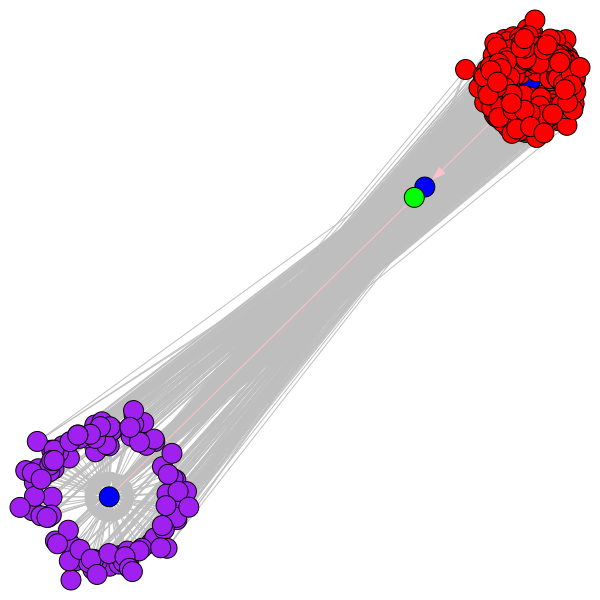

In [205]:
sufficientarian_graph_prime = graph.subgraph_edges(
    [e.index for e in graph.es if e.index not in sufficientarian_max_solutions[0][1]]
)
ig.plot(sufficientarian_graph_prime, min_x=0, max_x=25)

<AxesSubplot: xlabel='travel time', ylabel='Count'>

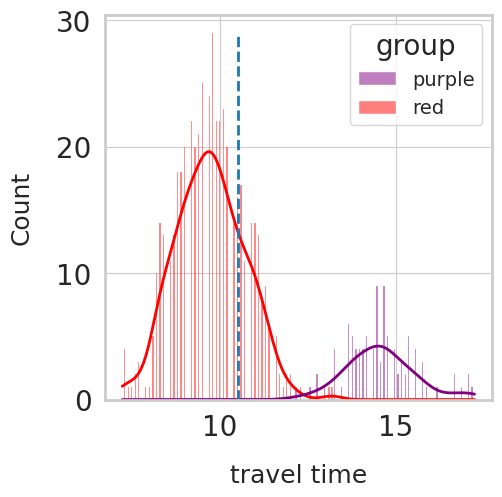

In [206]:
plot_travel_time_histogram(sufficientarian_graph_prime, census, min_x=0, max_x=25)

INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/analysis/full_problem_exploration.py:Possible states: [[[]], [[2403], [2404], [2405], [2406]], [[2403, 2404], [2403, 2405], [2403, 2406], [2404, 2405], [2404, 2406], [2405, 2406]], [[2403, 2404, 2405], [2403, 2404, 2406], [2403, 2405, 2406], [2404, 2405, 2406]]]
  0%|          | 0/4 [00:00<?, ?it/s]INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Received graph with:
	n_edges=2407	n_vertices=604
Created subgraph:
	n_edges=2407
	n_vertices=604
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:Resulting rewards:
	calculated_reward=-0.0
	scaled_reward=-0.0
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/analysis/full_problem_exploration.py:For state [] obtained rewards [-6.6000000000000005]
INFO:/home/rico/Documents/equitable-transport-reduction/eptnr_package/eptnr/rewards/base_reward.py:R

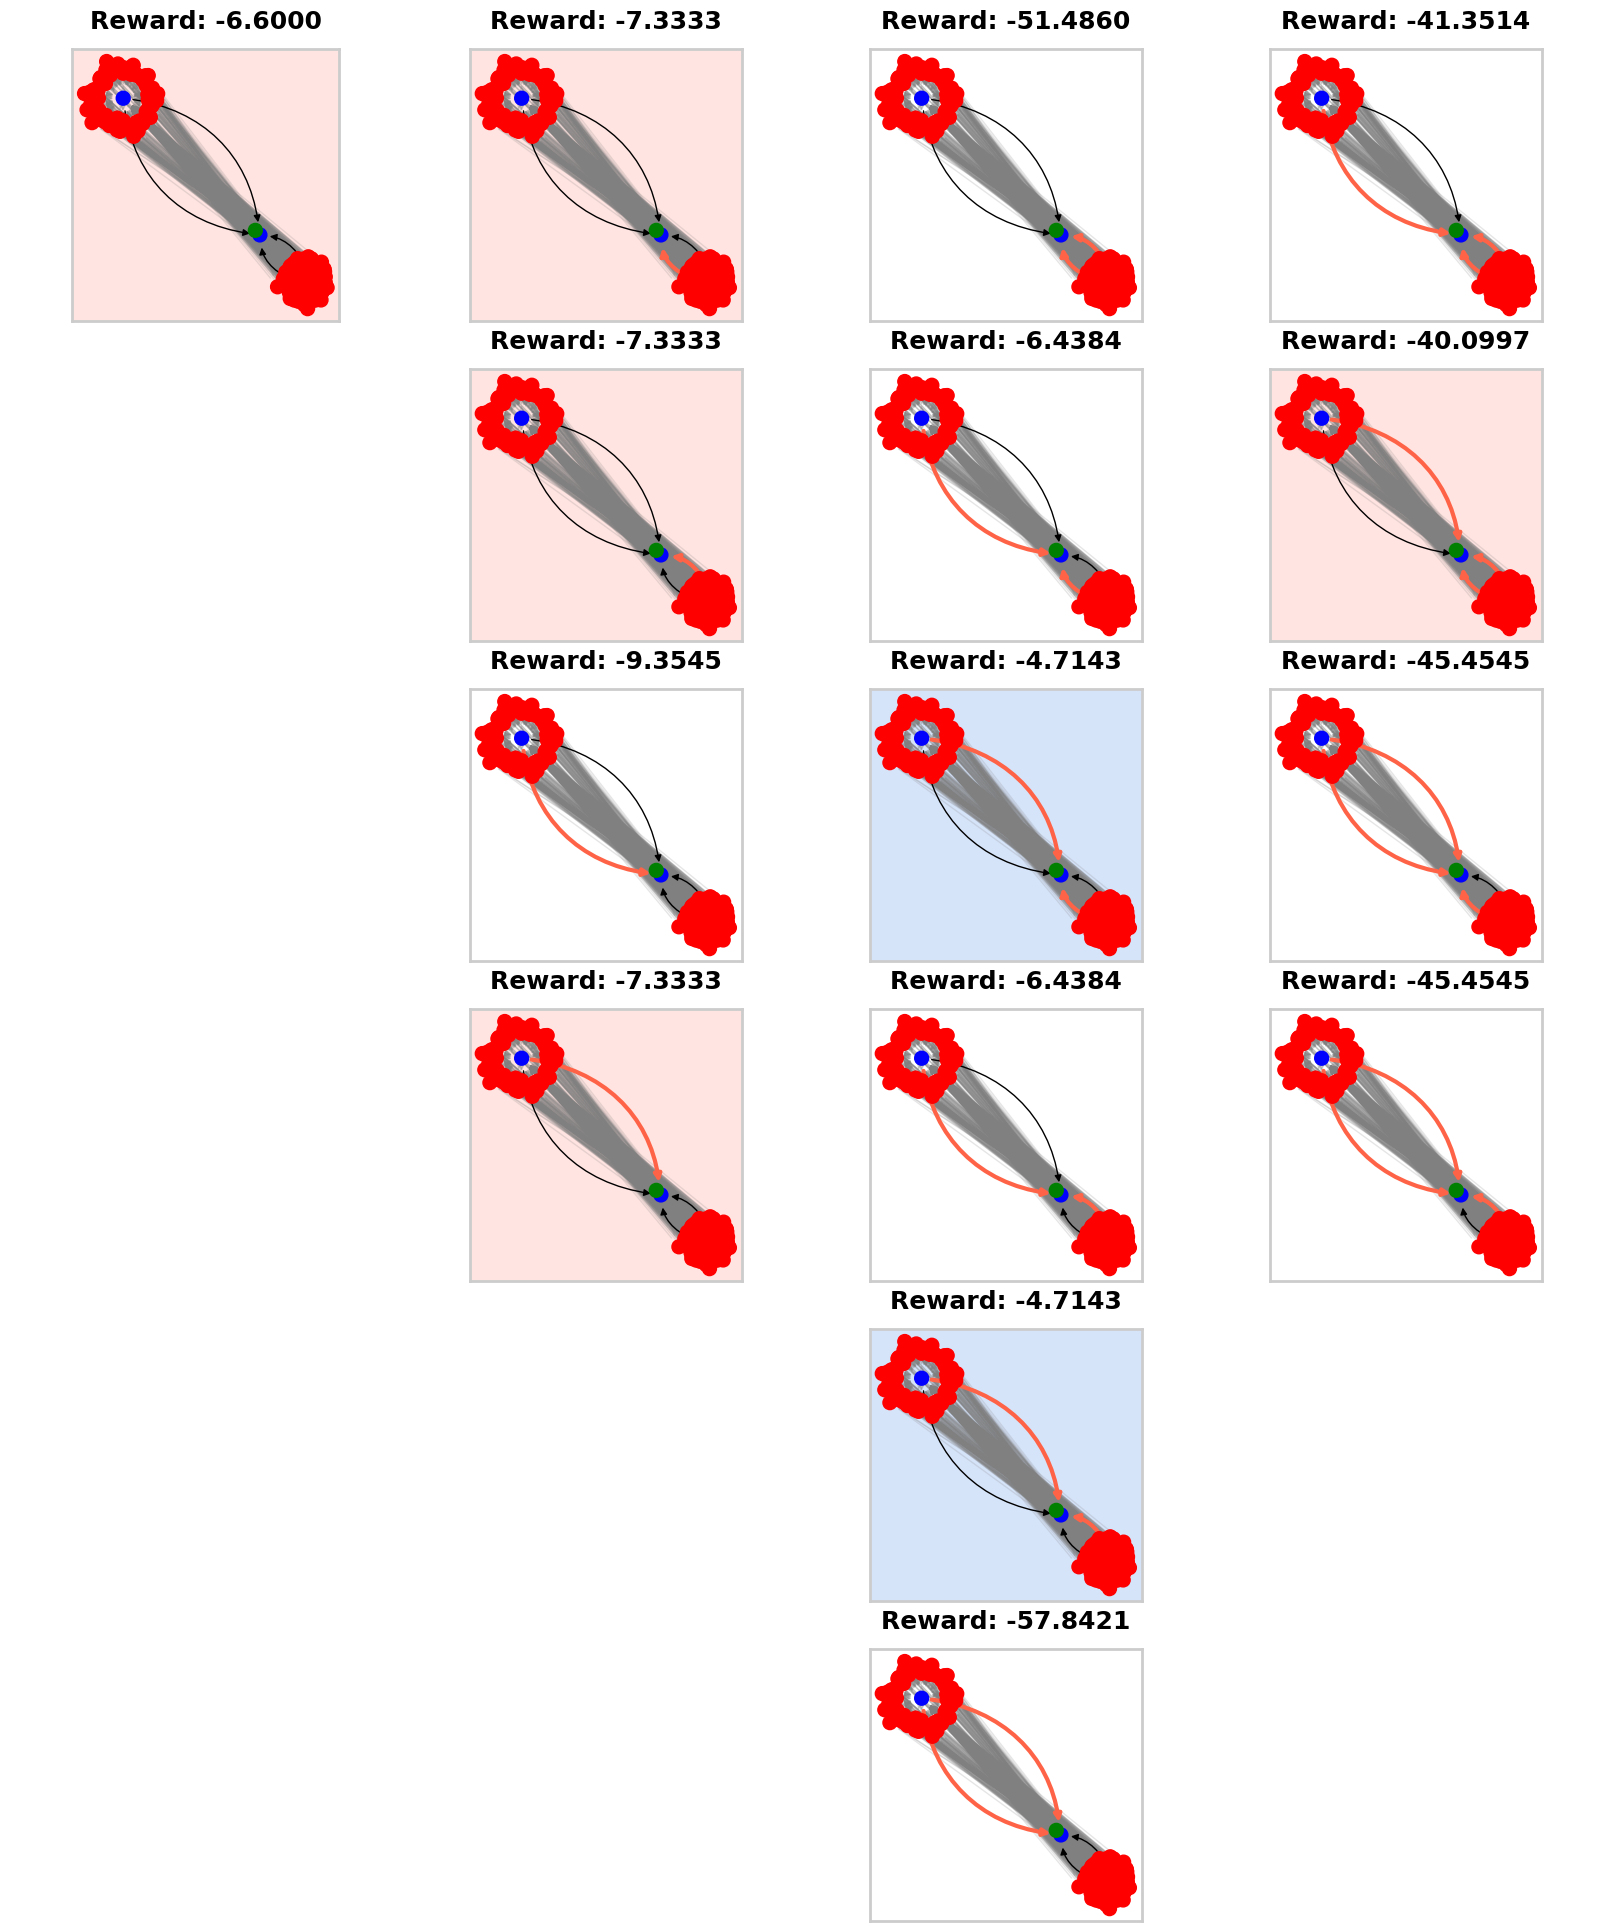

In [207]:
configurations, rewards = full_problem_exploration(g=graph, reward=sufficientarian_reward, edge_types=edge_types)
fig, axs = plot_full_problem_exploration(base_graph=graph, configurations=configurations, rewards=rewards)
plt.show()

# Direct comparison

<AxesSubplot: title={'center': 'Sufficientarian'}, xlabel='travel time', ylabel='Count'>

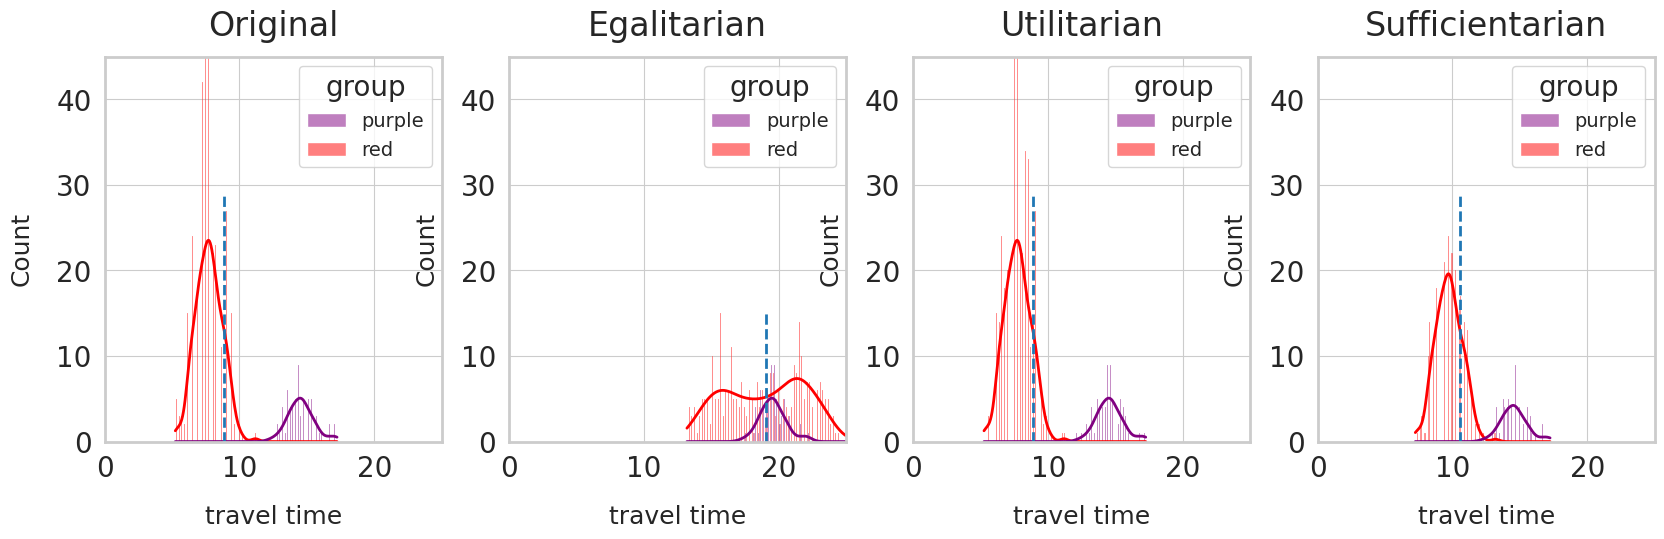

In [217]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
ax[0].set_title("Original")
plot_travel_time_histogram(graph,census,ax[0], 0, 25, 0, 45)

ax[1].set_title("Egalitarian")
plot_travel_time_histogram(egalitarian_graph_prime,census,ax[1], 0, 25, 0, 45)

ax[2].set_title("Utilitarian")
plot_travel_time_histogram(utilitarian_graph_prime,census,ax[2], 0, 25, 0, 45)

ax[3].set_title("Sufficientarian")
plot_travel_time_histogram(sufficientarian_graph_prime,census,ax[3], 0, 25, 0, 45)


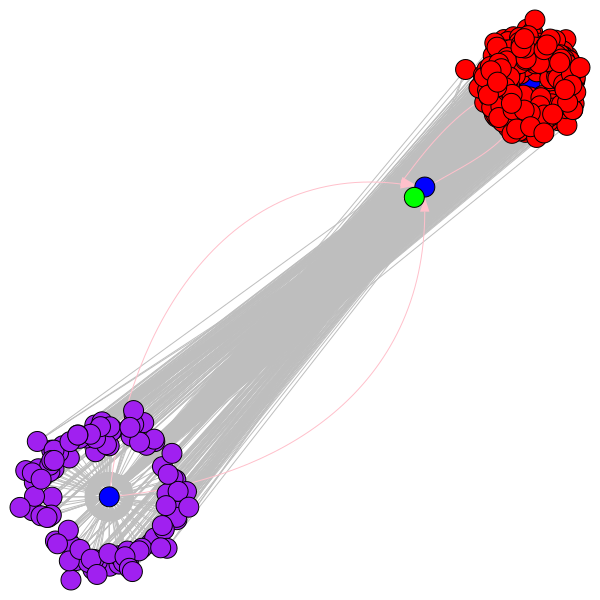

In [220]:
ig.plot(graph)